## Retrieve datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(37)

dataset_enc = pd.read_csv('numercialDataset.csv')

## Preparing input sample for all columns

In [2]:
# Preparing input sample for all columns
inp = dataset_enc
inp = inp.drop('Insomnia', axis=1)
inp = inp.drop('OCD', axis=1)
inp = inp.drop('Depression', axis=1)
inp = inp.drop('Mental health score', axis=1)
inp = inp.drop('Anxiety', axis=1)

# Preparing input sample for genre columns
# inp = inp.drop('Age', axis=1)
# inp = inp.drop('Hours per day', axis=1)
# inp = inp.drop('BPM', axis=1)
# inp = inp.drop('Primary streaming service', axis=1)
# inp = inp.drop('Music effects', axis=1)

inp

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,18.0,4.0,132.0,4,15,1,0,0,3,0,...,3,0,2,2,1,0,1,1,3,1
1,61.0,2.5,84.0,5,6,1,2,0,0,1,...,2,3,2,0,2,2,0,0,0,0
2,18.0,4.0,107.0,4,12,0,0,0,1,0,...,3,2,2,0,2,3,3,0,1,0
3,18.0,5.0,86.0,4,6,1,1,2,0,0,...,3,1,3,1,3,3,3,3,0,0
4,18.0,3.0,66.0,5,15,1,2,0,1,2,...,0,1,1,1,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,2.0,120.0,4,14,1,3,1,0,2,...,0,2,1,1,3,0,1,3,0,0
590,18.0,1.0,160.0,4,11,1,1,1,0,0,...,0,0,1,0,3,0,0,2,2,0
591,19.0,6.0,120.0,2,13,0,1,2,2,1,...,1,1,2,1,2,2,2,1,1,0
592,19.0,5.0,170.0,4,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,2,0


## Train model and test

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define x
X = inp

#'y' is target variable
y = dataset_enc['Mental health score']

pre_opt_regressor = RandomForestRegressor()


# Fitting Random Forest Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


pre_opt_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = pre_opt_regressor.predict(X_test)

## Visualise the outcome accuracy (Pre Opt)

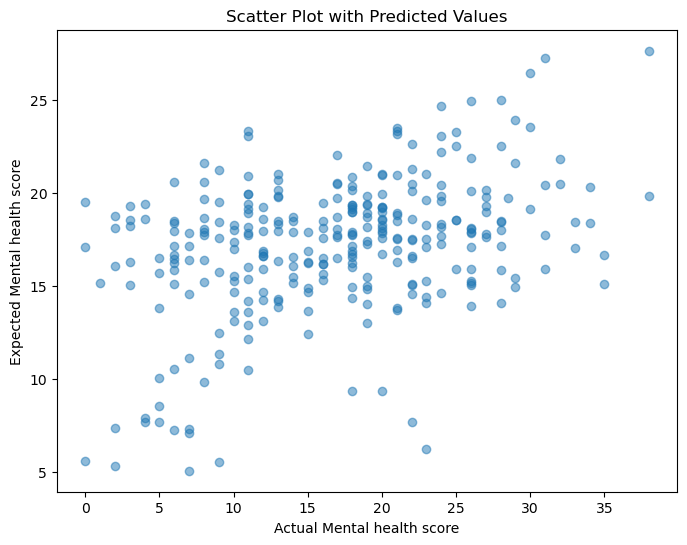

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements (Pre Opt)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.518067226890757
Mean Squared Error (MSE): 63.01672773109243
Root Mean Squared Error (RMSE): 7.938307611266549
R-squared (R2): 0.03186080634881039


## Show model

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
# tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
# plt.figure(figsize=(50, 30))
# plot_tree(tree_to_plot, feature_names=dataset_enc.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()

## Hyperparameters imports

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


## Format the best hyperparameters print

In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    best_params = results.best_params_
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in  zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    return best_params

## Define parameters to try and fit

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

regressor = RandomForestRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters = print_results(grid_search)

BEST PARAMS: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

-61.118 (+/-15.592) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-62.134 (+/-16.872) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-61.984 (+/-14.426) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
-61.957 (+/-15.553) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
-62.195 (+/-16.592) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
-61.953 (+/-16.851) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt

In [10]:
hp_regressor = RandomForestRegressor(**best_parameters)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

hp_regressor.fit(X_train_val, y_train_val)
val_score = hp_regressor.score(X_val, y_val)
print("Validation Score:", val_score)

# # Make predictions
y_pred = hp_regressor.predict(X_test)

Validation Score: 0.4609602777768501


## Visualise the outcome accuracy (Post Hyp-Opt)

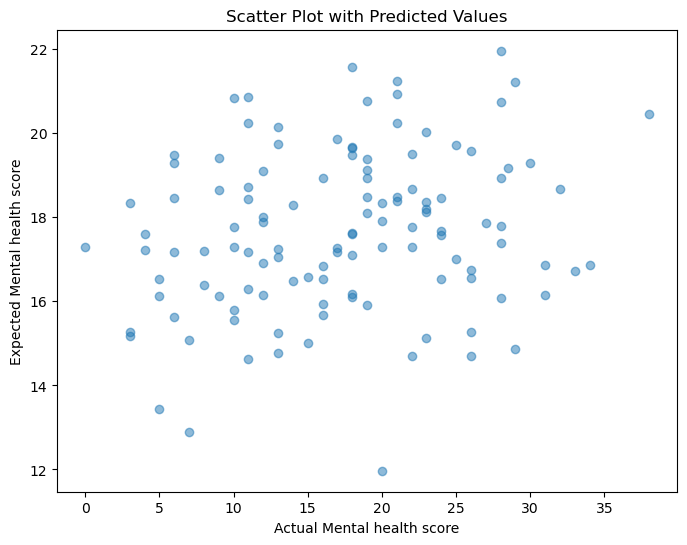

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements (Post Hyp-Opt)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.430815817622956
Mean Squared Error (MSE): 62.378734484357345
Root Mean Squared Error (RMSE): 7.898020922000482
R-squared (R2): 0.04166243029356265


## Find the importance of each feature

In [13]:
importance = hp_regressor.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13673
Feature: 1, Score: 0.07389
Feature: 2, Score: 0.10095
Feature: 3, Score: 0.02425
Feature: 4, Score: 0.05283
Feature: 5, Score: 0.01684
Feature: 6, Score: 0.03062
Feature: 7, Score: 0.02507
Feature: 8, Score: 0.04814
Feature: 9, Score: 0.05104
Feature: 10, Score: 0.01722
Feature: 11, Score: 0.02903
Feature: 12, Score: 0.03526
Feature: 13, Score: 0.02931
Feature: 14, Score: 0.02900
Feature: 15, Score: 0.03499
Feature: 16, Score: 0.04079
Feature: 17, Score: 0.04116
Feature: 18, Score: 0.03168
Feature: 19, Score: 0.04312
Feature: 20, Score: 0.04227
Feature: 21, Score: 0.03757
Feature: 22, Score: 0.02822


## View all X features

In [14]:
X

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,18.0,4.0,132.0,4,15,1,0,0,3,0,...,3,0,2,2,1,0,1,1,3,1
1,61.0,2.5,84.0,5,6,1,2,0,0,1,...,2,3,2,0,2,2,0,0,0,0
2,18.0,4.0,107.0,4,12,0,0,0,1,0,...,3,2,2,0,2,3,3,0,1,0
3,18.0,5.0,86.0,4,6,1,1,2,0,0,...,3,1,3,1,3,3,3,3,0,0
4,18.0,3.0,66.0,5,15,1,2,0,1,2,...,0,1,1,1,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,2.0,120.0,4,14,1,3,1,0,2,...,0,2,1,1,3,0,1,3,0,0
590,18.0,1.0,160.0,4,11,1,1,1,0,0,...,0,0,1,0,3,0,0,2,2,0
591,19.0,6.0,120.0,2,13,0,1,2,2,1,...,1,1,2,1,2,2,2,1,1,0
592,19.0,5.0,170.0,4,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,2,0


## Visualise feature importance

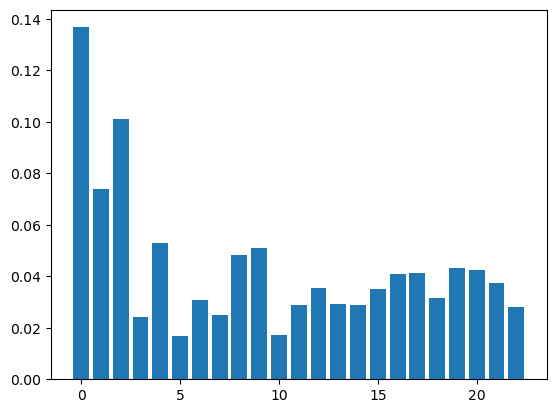

In [15]:
from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Remove unimportant features

In [16]:
# X = X.drop('Foreign languages', axis=1) #6
# X = X.drop('Frequency [Gospel]', axis=1) #11
# X = X.drop('Frequency [Classical]', axis=1) #7
# X = X.drop('Frequency [Country]', axis=1) #8
# X = X.drop('Frequency [Hip hop]', axis=1) #12
# X = X.drop('Frequency [K pop]', axis=1) #14
# X = X.drop('Music effects', axis=1) #23
# X = X.drop('Frequency [R&B]', axis=1) #19
X

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,18.0,4.0,132.0,4,15,1,0,0,3,0,...,3,0,2,2,1,0,1,1,3,1
1,61.0,2.5,84.0,5,6,1,2,0,0,1,...,2,3,2,0,2,2,0,0,0,0
2,18.0,4.0,107.0,4,12,0,0,0,1,0,...,3,2,2,0,2,3,3,0,1,0
3,18.0,5.0,86.0,4,6,1,1,2,0,0,...,3,1,3,1,3,3,3,3,0,0
4,18.0,3.0,66.0,5,15,1,2,0,1,2,...,0,1,1,1,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,2.0,120.0,4,14,1,3,1,0,2,...,0,2,1,1,3,0,1,3,0,0
590,18.0,1.0,160.0,4,11,1,1,1,0,0,...,0,0,1,0,3,0,0,2,2,0
591,19.0,6.0,120.0,2,13,0,1,2,2,1,...,1,1,2,1,2,2,2,1,1,0
592,19.0,5.0,170.0,4,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,2,0


## Create a new model

In [17]:


#'y' is target variable
y = dataset_enc['Mental health score']

feature_imp_regressor = RandomForestRegressor()


# Fitting Random Forest Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


feature_imp_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = feature_imp_regressor.predict(X_test)

## View accuracy (Post feature removals, Pre Hyp-Opt)

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

NameError: name 'Y_pred' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

## Find optimal hyperparameters for feature removed model

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

f_regressor = RandomForestRegressor()

grid_search = GridSearchCV(f_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters = print_results(grid_search)

## Train a model with best parameters and evaluate validation score

In [ ]:
hp_feature_regressor = RandomForestRegressor(**best_parameters)
y_train = pd.DataFrame(y_train) 
y_val = pd.DataFrame(y_val)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

hp_feature_regressor.fit(X_train_val, y_train_val)
val_score = hp_feature_regressor.score(X_val, y_val)
print("Validation Score:", val_score)

# # Make predictions
y_pred = hp_feature_regressor.predict(X_test)

## View accuracy (Post feature removals, Pre Hyp-Opt)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)